# IN269 Kecerdasan Bisnis
## Pertemuan 07: Binary Classification

## From Regression to Classification
- Previous model: Regression used to predict customer demands from data history.
- **Regression models** $\Rightarrow$ Predict numerical outcomes (e.g., sales, prices, demand).
- **Classification models** $\Rightarrow$ Predict categorical outcomes (e.g., fraud detection, letter recognition).

## Types of Classification Models
- **Binary classification** $\Rightarrow$ Two possible outcomes (e.g., fraud / not fraud).
- **Multiclass classification** $\Rightarrow$ More than two possible outcomes (e.g., iris flower species).
- **Multilabel classification** $\Rightarrow$ Input can belong to multiple classes (e.g., document tagged as both machine learning and genomics).

Misalkan kita mempunyai dataset sederhana seperti berikut:

In [2]:
import pandas as pd

simple_dataset = pd.DataFrame( {"X" : [1.0, 2.5, 3.0, 4.5, 6.0, 7.5, 8.0, 9.5], "Y" : [0,0,0,0,1,1,1,1] } )
simple_dataset

,X,Y
0,1.0,0
1,2.5,0
2,3.0,0
3,4.5,0
4,6.0,1
5,7.5,1
6,8.0,1
7,9.5,1


Di atas ada 2 kelas: 0 dan 1

Mari kita visualisasikan:

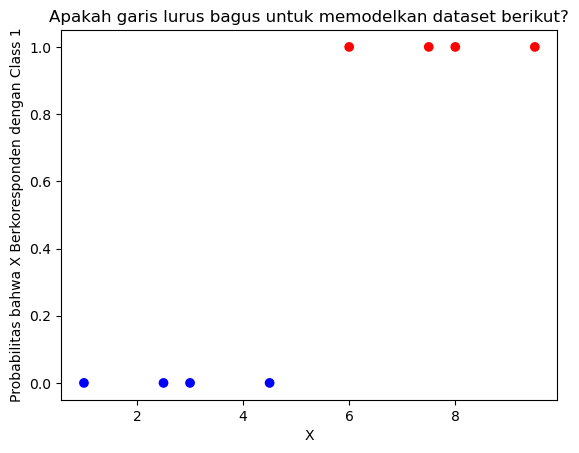

In [3]:
from matplotlib import pyplot as plt
colors = ["blue", "blue", "blue", "blue", "red", "red", "red", "red"]
plt.scatter(simple_dataset["X"], simple_dataset["Y"], c=colors)
plt.title("Apakah garis lurus bagus untuk memodelkan dataset berikut?")
plt.xlabel("X")
plt.ylabel("Probabilitas bahwa X Berkoresponden dengan Class 1")
plt.show()

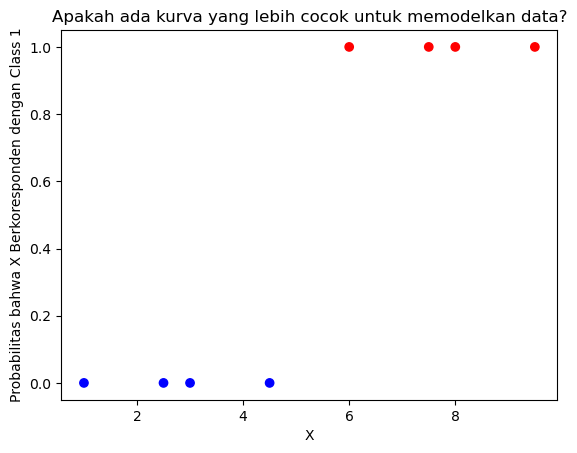

In [4]:
# import matplotlib
from matplotlib import pyplot as plt

# membuat warna untuk tiap data
colors = ["blue", "blue", "blue", "blue", "red", "red", "red", "red"]

# kita plot
plt.scatter(simple_dataset["X"], simple_dataset["Y"], c=colors)
plt.title("Apakah ada kurva yang lebih cocok untuk memodelkan data?")
plt.xlabel("X")
plt.ylabel("Probabilitas bahwa X Berkoresponden dengan Class 1")
plt.show()

- One important curve yang cocok is called the **logistic curve**. 
- Mathematically, the logistic curve can be described by the following function:
$$
    \text{logistic}(x) = \frac{1}{1+e^{-(mx + b)}}
$$
- Model atau persamaan ini disebut **logistic regression**. 

- Scikit's `LogisticRegression` class dapat kita gunakan untuk membuat model logistic regression. 
- With it, training a logistic regression model can be as simple as this:

In [5]:
X = simple_dataset["X"].to_numpy().reshape(-1,1)
Y = simple_dataset["Y"].to_numpy()

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Once the model is trained, you can call its `predict` method to predict which class the input belongs to, or its `predict_proba` method to get the computed probabilities for each class.

Mari kita coba prediksi untuk `X=10.0`.

In [8]:
predicted_class = model.predict([[10.0]])[0]
print(1, predicted_class)

predicted_class1 = model.predict([[10.0]])
print(2, predicted_class1)

1 1
2 [1]


And these statements show the probabilities computed for each class:

In [9]:
predicted_probabilities = model.predict_proba([[10.0]])[0]
print(f'Class 0: {predicted_probabilities[0]}') 
print(f'Class 1: {predicted_probabilities[1]}')

Class 0: 0.005007565807273462
Class 1: 0.9949924341927265


Scikit also includes the `LogisticRegressionCV` class for training logistic regression models with built-in **cross-validation**.    
    
> Apa masalah menggunakan `train_test_split`?    

- When `train_test_split` splits a dataset, it randomly selects rows for the training dataset and the test dataset. 
- The `random_state` parameter seeds the random-number generator used to make selections.
- The fact remains that the number you seed `train_test_split`'s random-number generator with affects the outcome. 
- The smaller the dataset, the greater that effect is likely to be.

<h2>To cross-validate a model, you partition the dataset into folds</h2>
<br/>
<center>
    <img src="images/cross-validation.png" width="700">
</center>    

The following statements train a logistic regression model using five folds:

In [10]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(cv=3)
model.fit(X,Y)

,Cs,10
,fit_intercept,True
,cv,3
,dual,False
,penalty,'l2'
,scoring,None
,solver,'lbfgs'
,tol,0.0001
,max_iter,100
,class_weight,None
,n_jobs,None


Berikut hyperparameter `C` terbaik yang memberikan performance terbaik:

In [11]:
model.C_

array([0.04641589])

## Accuracy Measures for Classification Models
### Precision
Computed by dividing the number of true positives by the sum of the true posi‐
tives and false positives 
   
### Recall
Computed by dividing the number of true positives by the sum of the true posi‐
tives and false negatives

<h2>Hitunglah Precision, Recall, dan $F_1$ score!</h2>
<center>
    <img src="images/precision+recall.png" width="700">
</center>

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

y_true = [0, 0, 0, 1, 1, 1]
y_pred = [0, 1, 1, 0, 1, 1]

In [16]:
# Hitunglah F1 score

print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))

Confusion matrix:
 [[1 2]
 [1 2]]
Accuracy: 0.5
Precision: 0.5
Recall: 0.6666666666666666
F1 Score: 0.5714285714285714


<h2>Contoh Receiver Operating Characteristic (ROC) curve</h2>
<br/>
<center>
    <img src="images/roc-curve.png" width="700">
</center>


### True Positive Rate = Recall
$$
    \text{True Positive Rate} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative} }
$$

### False Positive Rate
$$
    \text{False Positive Rate} = \frac{\text{False Positive}}{\text{False Positive} + \text{True Negative} }
$$

<h2>Contoh Confusion Matrix</h2>
<br/>
<center>
    <img src="images/confusion-matrix.png" width="700">
</center>


- Other terms you might come across when discussing the accuracy of classification models include **sensitivity** and **specificity**. 
- _Sensitivity is identical to recall_
- _Specificity_ is recall for the negative class rather than the positive class.

- Sensitivity and specificity are frequently used in drug testing and cancer screening.
- Suppose you're traveling abroad and require a negative COVID test before returning home. 
- If you don’t have COVID, what are the chances that a test will incorrectly say you do?
- The answer is the test's **specificity** $\Rightarrow$ a measure of how accurate the test is at identifying negative samples. 
- **Sensitivity**, on the other hand, reveals how likely the test is to be correct if it says you do have COVID.

## Studi Kasus: Classifying Passengers who Sailed on the Titanic

<br/>
<center>
    <img src="images/titanic.jpg" width="700">
</center>    

## Load and prepare the dataset

The first step is to load the dataset and prepare it for training a machine-learning model.

In [18]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Determine whether any of the columns in the dataset are _missing values_.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Filter the dataset to remove columns that won't be used, 
- One-hot-encode the "Sex" and "Pclass" columns, and 
- Remove rows with missing values.

In [20]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df = df.dropna()
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


- Now split the data into two datasets: one for training and one for testing. 
- We'll use a stratified split to create a balanced distribution of samples in the training dataset and the testing dataset.

In [21]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

## Build and train a model

Our classifier will use logistic regression. Logistic regression not only makes predictions, it yields probabilities as well.

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Get an accuracy score.

In [23]:
model.score(x_test, y_test)

0.8321678321678322

Cross-validate the model using five folds.

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7857480547621394

Use a confusion matrix to see how the model performed during testing.

In [25]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[78,  7],
       [17, 41]], dtype=int64)

Print the confusion matrix again, but this time use `ConfusionMatrixDisplay.from_estimator` for a helpful visual.

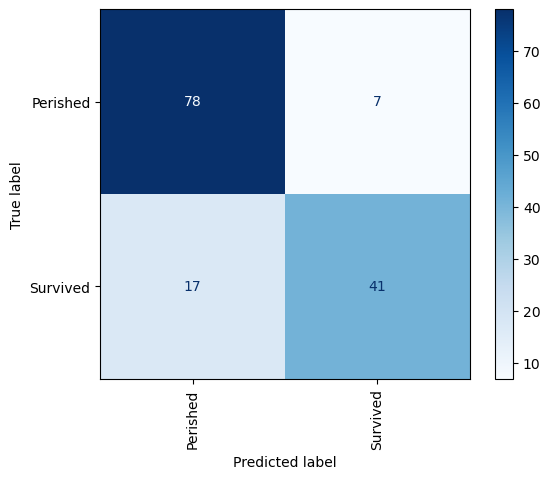

In [26]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test, display_labels=['Perished', 'Survived'], 
                   cmap='Blues', xticks_rotation='vertical')

Visualize the model's accuracy by plotting an ROC curve.

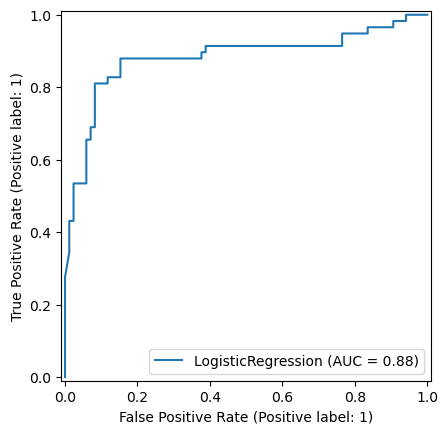

In [27]:
from sklearn.metrics import RocCurveDisplay as rcd

rcd.from_estimator(model, x_test, y_test)

Now use Scikit's [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) and [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) functions to compute precision, recall, sensitivity, and specificity for the model:

In [28]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Precision: 0.8541666666666666
Recall: 0.7068965517241379
Sensitivity: 0.7068965517241379
Specificity: 0.9176470588235294


## Pertanyaan untuk Dipikirkan
- Is the high specificity score consistent with the observation that the model is more adept at identifying passengers who won’t survive than those who will? 
- How would you explain the relatively low recall and sensitivity scores?

## Use the model to make predictions

Now use the model to predict whether a 30-year-old female traveling in first class will survive the voyage.

In [29]:
female = pd.DataFrame({ 'Age': [30], 'Sex_female': [1], 'Sex_male': [0],
                        'Pclass_1': [1], 'Pclass_2': [0], 'Pclass_3': [0] })

model.predict(female)[0]

1

More to the point, what is the probability that a 30-year-old female traveling in first class will survive?

In [30]:
probability = model.predict_proba(female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 91.6%


How about a 60-year-old male traveling in third class?

In [31]:
male = pd.DataFrame({ 'Age': [60], 'Sex_female': [0], 'Sex_male': [1],
                      'Pclass_1': [0], 'Pclass_2': [0], 'Pclass_3': [1] })

probability = model.predict_proba(male)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 2.9%


Based on these examples, can you esimate the chance of survival for a 12-year-old boy traveling in second class?

In [32]:
# ==========================
#   Write Your Code Below
# ==========================


boy = pd.DataFrame({ 'Age': [12], 'Sex_female': [0], 'Sex_male': [1],
                      'Pclass_1': [0], 'Pclass_2': [1], 'Pclass_3': [0] })

probability = model.predict_proba(boy)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 40.1%


<center>
        <h1>The End</h1>
</center>